In this implementation:
- Missing values are treated as a separate category i.e. we do not replace missing values with NaN.
- Use 99:1 train to validation set ratio.


In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
# Set printing options. 
# These options determine the way floating point numbers, arrays and
# other NumPy objects are displayed.
np.set_printoptions(threshold=50, edgeitems=20)

### Set data path

In [4]:
#PATH = 'data/porto-seguro/'
PATH = '/home/jd/data/PortoDriver/'

### Read csv data into dataframe

In [5]:
train_data_df = pd.read_csv(f'{PATH}train.csv')
test_data_df = pd.read_csv(f'{PATH}test.csv')

# I need differant Path
#train_data_df = pd.read_csv(f'{PATH}train/train.csv')
#test_data_df = pd.read_csv(f'{PATH}test/test.csv')

In [6]:
# test_data need target
test_data_df['target']=0

### List of column names

In [7]:
all_var = [var for var in train_data_df.columns]

In [8]:
all_var

['id',
 'target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Create list of categorical and continuous variables

In [9]:
cat_vars = [var for var in train_data_df.columns if var.endswith('cat')]
bin_vars = [var for var in train_data_df.columns if var.endswith('bin')]
ind_vars = ['ps_ind_01', 'ps_ind_03','ps_ind_14', 'ps_ind_15']
cat_vars = cat_vars + bin_vars #+ ind_vars
cat_vars

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [10]:
cont_vars = [var for var in train_data_df.columns if var not in cat_vars]
cont_vars

['id',
 'target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [11]:
for var in cat_vars: 
    train_data_df[var] = train_data_df[var].astype('category').cat.as_ordered()
    test_data_df[var] = test_data_df[var].astype('category').cat.as_ordered()

In [12]:
for var in cont_vars:
    train_data_df[var] = train_data_df[var].astype('float32')
    test_data_df[var] = test_data_df[var].astype('float32')

In [13]:
del cont_vars[1]

In [14]:
cont_vars

['id',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [15]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null float32
target            595212 non-null float32
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null f

### Display training data sample

In [16]:
train_data_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7.0,0.0,2.0,2,5.0,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0,1,1,0,0,1
1,9.0,0.0,1.0,1,7.0,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0,1,1,0,1,0
2,13.0,0.0,5.0,4,9.0,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0,1,1,0,1,0
3,16.0,0.0,0.0,1,2.0,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0,0,0,0,0,0
4,17.0,0.0,0.0,2,0.0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0,0,0,1,1,0


### Display test data sample

In [17]:
test_data_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,0.0,0.0,1,8.0,1,0,0,1,0,0,...,1.0,1.0,12.0,0,1,1,0,0,1,0.0
1,1.0,4.0,2,5.0,1,0,0,0,0,1,...,0.0,3.0,10.0,0,0,1,1,0,1,0.0
2,2.0,5.0,1,3.0,0,0,0,0,0,1,...,0.0,2.0,4.0,0,0,0,0,0,0,0.0
3,3.0,0.0,1,6.0,0,0,1,0,0,0,...,1.0,0.0,5.0,1,0,1,0,0,0,0.0
4,4.0,5.0,1,7.0,0,0,0,0,0,1,...,0.0,0.0,4.0,0,1,1,0,0,1,0.0


### Create validation set indices

In [18]:
# Tune VAL_PCT hyperparameter
# Tune MAX_FOLDS hyperparameter
VAL_FRAC = 0.01
MAX_FOLDS = 5

num_obs = train_data_df.shape[0]

cv_dict = {f'ids_fold_{num_fold}': get_cv_idxs(n=num_obs, cv_idx=num_fold, val_pct=VAL_FRAC) for num_fold in range(MAX_FOLDS)}

In [19]:
len(cv_dict['ids_fold_0'])

5952

### Set response variable

In [20]:
TARGET_VAR = "target"

### Train set, response variable, feature scaling

In [21]:
train, target, nas, mapper = proc_df(df=train_data_df, y_fld=TARGET_VAR, do_scale=True)

# for test
test_df, target2, nas2, mapper2 = proc_df(df=test_data_df, y_fld=TARGET_VAR, do_scale=True, #skip_flds=['id'],
                                  mapper=mapper, na_dict=nas)

### Convert categorical values to type `category`

In [22]:
for var in cat_vars: 
    train[var] = train[var].astype('category').cat.as_ordered()
    test_df[var] = test_df[var].astype('category').cat.as_ordered()

### Convert remaining variables to `float32`

In [23]:
for var in cont_vars:
    train[var] = train[var].astype('float32')
    test_df[var] = test_df[var].astype('float32')

target.astype('float32')

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
       ...,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
id                595212 non-null float32
ps_ind_01         595212 non-null float32
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null float32
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null float32
ps_ind_15         595212 non-null float32
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-null float32
ps_reg_02         595212 non-null f

### Gini metric

In [25]:
from sklearn.metrics import roc_auc_score

inv_log = lambda x : np.exp(x)

def gini_metric(preds, targs):
    preds = inv_log(preds)
    auc = roc_auc_score(y_true=targs, y_score=preds)
    return 2 * auc - 1

### Create embeddings

In [26]:
cat_sz = [(c, len(train[c].cat.categories) + 1) for c in cat_vars]

In [27]:
cat_sz

[('ps_ind_02_cat', 6),
 ('ps_ind_04_cat', 4),
 ('ps_ind_05_cat', 9),
 ('ps_car_01_cat', 14),
 ('ps_car_02_cat', 4),
 ('ps_car_03_cat', 4),
 ('ps_car_04_cat', 11),
 ('ps_car_05_cat', 4),
 ('ps_car_06_cat', 19),
 ('ps_car_07_cat', 4),
 ('ps_car_08_cat', 3),
 ('ps_car_09_cat', 7),
 ('ps_car_10_cat', 4),
 ('ps_car_11_cat', 105),
 ('ps_ind_06_bin', 3),
 ('ps_ind_07_bin', 3),
 ('ps_ind_08_bin', 3),
 ('ps_ind_09_bin', 3),
 ('ps_ind_10_bin', 3),
 ('ps_ind_11_bin', 3),
 ('ps_ind_12_bin', 3),
 ('ps_ind_13_bin', 3),
 ('ps_ind_16_bin', 3),
 ('ps_ind_17_bin', 3),
 ('ps_ind_18_bin', 3),
 ('ps_calc_15_bin', 3),
 ('ps_calc_16_bin', 3),
 ('ps_calc_17_bin', 3),
 ('ps_calc_18_bin', 3),
 ('ps_calc_19_bin', 3),
 ('ps_calc_20_bin', 3)]

In [28]:
emb_szs = [(c, min(100, (c + 1) // 2)) for _, c in cat_sz]

In [29]:
emb_szs

[(6, 3),
 (4, 2),
 (9, 5),
 (14, 7),
 (4, 2),
 (4, 2),
 (11, 6),
 (4, 2),
 (19, 10),
 (4, 2),
 (3, 2),
 (7, 4),
 (4, 2),
 (105, 53),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2)]

### Model Architecture / Hyperparameters

In [30]:
layer_1 = 1024
layer_2 = 512
layer_3 = 256
batch_size = 256
embed_dropout = 0.01
layer_dropout = 0.15

In [31]:
# Original
# Create model with all category variables
#md = ColumnarModelData.from_data_frame(path=PATH, 
#                                       val_idxs=cv_dict['ids_fold_0'], 
#                                       df=train, 
#                                       y=target, 
#                                       cat_flds=cat_vars, 
#                                       bs=batch_size)

In [32]:
len(train),len(test_df)

(595212, 892816)

In [33]:
# Create model with test
md = ColumnarModelData.from_data_frame(path=PATH, 
                                       val_idxs=cv_dict['ids_fold_0'], 
                                       df=train, 
                                       y=target, 
                                       cat_flds=cat_vars, 
                                       bs=batch_size,
                                       test_df=test_df)

### Model learner

In [34]:
# Use all categorical variables
m = md.get_learner(emb_szs=emb_szs, 
                   n_cont=(len(train.columns) - len(cat_vars)),
                   emb_drop=embed_dropout, 
                   out_sz=1, 
                   szs=[layer_1, layer_2], 
                   drops=[layer_dropout, layer_dropout], 
                   y_range=None)


In [35]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 64%|██████▍   | 1476/2302 [00:13<00:07, 108.93it/s, loss=6.01]  

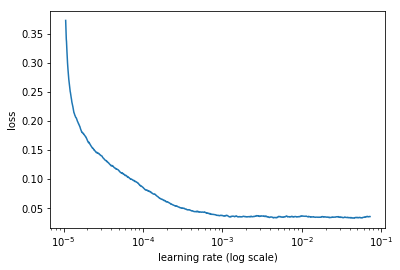

In [36]:
m.sched.plot()

In [37]:
lr = 0.0001

In [38]:
m.fit(lrs=lr, n_cycle=2, metrics=[accuracy, gini_metric])

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))


  4%|▍         | 102/2302 [00:02<00:59, 36.71it/s, loss=0.117]


  9%|▉         | 209/2302 [00:04<00:42, 48.96it/s, loss=0.0781]


 14%|█▍        | 321/2302 [00:05<00:31, 62.86it/s, loss=0.0603]


 19%|█▉        | 433/2302 [00:05<00:25, 72.83it/s, loss=0.0515]


 19%|█▉        | 447/2302 [00:06<00:25, 73.38it/s, loss=0.0498]

 21%|██        | 475/2302 [00:06<00:24, 75.46it/s, loss=0.0468]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jd/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[ 0.       0.03427  0.03577  0.96276  0.19155]                   
 32%|███▏      | 735/2302 [00:08<00:17, 88.55it/s, loss=0.0368]


KeyboardInterrupt: 

In [ ]:
m.fit(lrs=lr, n_cycle=2, cycle_len=2, metrics=[accuracy, gini_metric])

In [39]:
m.predict()

array([[ 0.05186],
       [ 0.04416],
       [ 0.0347 ],
       [ 0.03266],
       [ 0.03816],
       [ 0.02917],
       [ 0.01616],
       [ 0.01639],
       [ 0.05   ],
       [ 0.03006],
       [ 0.02142],
       [ 0.02233],
       [ 0.02205],
       [ 0.02244],
       [ 0.03281],
       [ 0.03658],
       [ 0.02335],
       [ 0.04796],
       [ 0.01335],
       [ 0.02571],
       ..., 
       [ 0.02359],
       [ 0.02876],
       [ 0.02623],
       [ 0.03462],
       [ 0.04133],
       [ 0.03849],
       [ 0.03238],
       [ 0.03066],
       [ 0.01211],
       [ 0.02491],
       [ 0.02858],
       [ 0.04625],
       [ 0.04638],
       [ 0.03099],
       [ 0.05011],
       [ 0.03593],
       [ 0.03032],
       [ 0.03429],
       [ 0.03395],
       [ 0.02123]], dtype=float32)

In [40]:
m

MixedInputModel (
  (embs): ModuleList (
    (0): Embedding(6, 3)
    (1): Embedding(4, 2)
    (2): Embedding(9, 5)
    (3): Embedding(14, 7)
    (4): Embedding(4, 2)
    (5): Embedding(4, 2)
    (6): Embedding(11, 6)
    (7): Embedding(4, 2)
    (8): Embedding(19, 10)
    (9): Embedding(4, 2)
    (10): Embedding(3, 2)
    (11): Embedding(7, 4)
    (12): Embedding(4, 2)
    (13): Embedding(105, 53)
    (14): Embedding(3, 2)
    (15): Embedding(3, 2)
    (16): Embedding(3, 2)
    (17): Embedding(3, 2)
    (18): Embedding(3, 2)
    (19): Embedding(3, 2)
    (20): Embedding(3, 2)
    (21): Embedding(3, 2)
    (22): Embedding(3, 2)
    (23): Embedding(3, 2)
    (24): Embedding(3, 2)
    (25): Embedding(3, 2)
    (26): Embedding(3, 2)
    (27): Embedding(3, 2)
    (28): Embedding(3, 2)
    (29): Embedding(3, 2)
    (30): Embedding(3, 2)
  )
  (lins): ModuleList (
    (0): Linear (163 -> 1024)
    (1): Linear (1024 -> 512)
  )
  (bns): ModuleList (
    (0): BatchNorm1d(1024, eps=1e-05, momen

## Prediction

In [41]:
m.save('val0')

In [42]:
m.load('val0')

In [43]:
x,y=m.predict_with_targs()

In [45]:
# Why? No idea, stole from Rossman
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

In [46]:
exp_rmspe(x,y)

0.12388137881651098

In [47]:
pred_test=m.predict(True)

In [49]:
test_df['pred_target']=pred_test

In [50]:
test_df['pred_target']

0         0.018527
1         0.027269
2         0.014767
3         0.029961
4         0.021145
5         0.012645
6         0.011075
7         0.021942
8         0.052832
9         0.024897
10        0.028502
11        0.023400
12        0.047333
13        0.068052
14        0.027686
15        0.013865
16        0.029167
17        0.027831
18       -0.001470
19        0.034704
20        0.025101
21        0.039492
22        0.046785
23        0.017718
24        0.038287
25        0.020141
26        0.043165
27        0.022633
28        0.028548
29        0.025474
            ...   
892786    0.027356
892787    0.032700
892788    0.035545
892789    0.034481
892790    0.036384
892791    0.022455
892792    0.028851
892793    0.032623
892794    0.036109
892795    0.024120
892796    0.038324
892797    0.056812
892798    0.034082
892799    0.036444
892800    0.028223
892801    0.031476
892802    0.034189
892803    0.035549
892804    0.019611
892805    0.024895
892806    0.015843
892807    0.

## Submission

In [51]:
## Sets up the test use
submission = pd.DataFrame({'id': test_df.id, 'target': test_df.pred_target})
# Shows 5 to ensure formatting is correct
submission[:10]

,id,target
0,-1.732324,0.018527
1,-1.732322,0.027269
2,-1.732319,0.014767
3,-1.732317,0.029961
4,-1.732315,0.021145
5,-1.732312,0.012645
6,-1.732310,0.011075
7,-1.732305,0.021942
8,-1.732301,0.052832
9,-1.732298,0.024897


In [53]:
# Makes the submission name out of folders
path3 = PATH +'submits/'
## labels submissions in order
numFiles=len(os.listdir(path3))
subm_name = 'submission'+str(numFiles)+'.csv.gz'

In [54]:
## prints it out to downloaded
submission.to_csv((path3+subm_name), index=False, compression='gzip')
print ('http://localhost:8888/view/data/PortoDriver/submits/'+subm_name)

http://localhost:8888/view/data/PortoDriver/submits/submission20.csv.gz
